In [1]:
import numpy as np
import pandas as pd
import imageio
import os
from matplotlib import pyplot as plt

# Data Processing

In [26]:
ids = []
im_shape = 112 * 92
images = np.zeros((1, im_shape))
folders = next(os.walk("./"))[1]
for folder in folders:
    path = "./" + folder
    for file in next(os.walk(path))[2]:
        ids.append([folder, file.replace(".pgm", "")])
        image = imageio.imread(path + "/" + file)
        image = np.array(image, dtype=float)
        image = image.reshape(1, im_shape)
        images = np.append(images, image, axis = 0)

images = np.delete(images, 0, axis=0)
images = images/255.0
ids = np.array(ids)
df = pd.DataFrame(images)
df["subject"] = ids[:,0]
df["n_image"] = ids[:,1]
df["subject"] = df["subject"].apply(lambda x: int(x[1:]))

C:\Users\Carlos\AppData\Local\Temp\ipykernel_30316\832901530.py:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(path + "/" + file)


In [27]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,10296,10297,10298,10299,10300,10301,10302,10303,subject,n_image
0,0.188235,0.192157,0.176471,0.184314,0.192157,0.223529,0.152941,0.164706,0.207843,0.192157,...,0.156863,0.160784,0.192157,0.164706,0.172549,0.184314,0.180392,0.180392,1,1
1,0.133333,0.133333,0.129412,0.125490,0.149020,0.156863,0.152941,0.192157,0.211765,0.223529,...,0.149020,0.117647,0.145098,0.117647,0.141176,0.145098,0.156863,0.129412,1,10
2,0.235294,0.235294,0.243137,0.207843,0.188235,0.200000,0.239216,0.235294,0.278431,0.266667,...,0.109804,0.129412,0.121569,0.121569,0.145098,0.125490,0.133333,0.133333,1,2
3,0.152941,0.172549,0.207843,0.145098,0.239216,0.188235,0.239216,0.176471,0.137255,0.156863,...,0.141176,0.125490,0.109804,0.125490,0.121569,0.113725,0.101961,0.113725,1,3
4,0.247059,0.207843,0.137255,0.141176,0.129412,0.133333,0.121569,0.137255,0.152941,0.168627,...,0.650980,0.631373,0.619608,0.662745,0.537255,0.160784,0.039216,0.094118,1,4


In [151]:
a = df.iloc[:,:-2].values

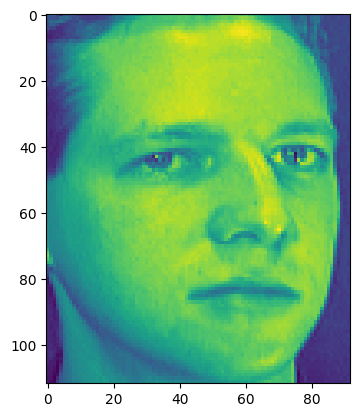

In [159]:
plt.imshow(a[5].reshape(112,92))

In [28]:
df.to_csv('orl.csv', encoding='utf-8') 
